# Decision Tree & Ensemble Methods
## IE 7860 Winter 20202
## Kayleigh James


Assignment Description:

Build decision trees and ensemble models for a good classification dataset of interest. Discussion and analysis of the results from the following models will be expected:

- Single Decision Tree (5 Points)
- XGBoost Model (5 Points)
- Bagging Model (5 Points)
- Random Forest Model (5 Points)
- Feature importance using Random Forest and XGBoost models (5 Points)
- Feature importance using any Explainable AI Package (e.g., LIME or SHAP) (5 Points)


For this project I will be using a data set from the University of California - Irvine repository regarding diagnosis of breast cancer from attributes of an image of the mass:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29


The attribute we will be predicting is diagnosis (benign or malignant).  This is a **binary classification** problem.  The other attributes available as predictors are as follows:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

To start we load in the .csv as a pandas dataframe:

In [38]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

ModuleNotFoundError: No module named 'google.colab'

We can disregard the id column as loading the dataset into a pandas dataframe assigns each pattern an index.  Now let's drop that column:

In [2]:
df = df.drop('id', axis=1)
df = df.drop('Unnamed: 32', axis=1)

We can also get some summary statistics of the data:

In [3]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


And the dimensions of the dataset:

In [4]:
df.shape

(569, 31)

So we can see that we have 569 observations (i.e. patterns) and 31 inputs.  We should also check and see how balanced our classes are: 

In [5]:
df[df.diagnosis == 'M'].shape[0]

212

So we have 212 observations of malignant tumors which means we have 357 observations of benign tumors. This is pretty balanced so I don't think it is necessary to balance the dataset.

Before we continue we should make sure all of the features are the data type we're anticipating (floating point numbers aside from the diagnosis).

In [6]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

We can see that the dataframe contains values in the type that we expect.  Now let's see if any cleaning is needed by checking for observations will NULL values.

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

We can see that there are no null values in the data set so let's check if there are any duplicates.

In [8]:
df.duplicated().sum()

0

We have confirmed there are no duplicates in the data.  Now we need to to get the data in the correct format and normalize it, we will use the sklearn package to do so.  We normalize the inputs in order to prevent an unstable and slow learning process.  The standard scaler will transform the input variables so that they are Gaussian with 0 mean and unit variance.  We encode the output variable in order for the SVMs to make sense of it.

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#X is the input dataset
X = df.iloc[:,1:]

#y are the class labels/expected outputs
y = df.iloc[:,0]

#for y, we want to change the format from categorical to 1's and 0's, malignant will be 1, benign a 0
le = LabelEncoder()
y = le.fit_transform(y)

#for X, we need to scale all of the values before feeding into the neural network
scaler = StandardScaler()
X = scaler.fit_transform(X)

#form a test/train split, 15% of the data will be reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

Now that we have normalized the data, encoded our outputs, and created a test/train split, we can move onto building our tree based and ensemble methods. 

## Single Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz

FEATURE_NAMES = list(df.iloc[:,1:].columns.values) 

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

              precision    recall  f1-score   support

           0       0.97      0.83      0.89        35
           1       0.78      0.95      0.86        22

   micro avg       0.88      0.88      0.88        57
   macro avg       0.87      0.89      0.87        57
weighted avg       0.89      0.88      0.88        57



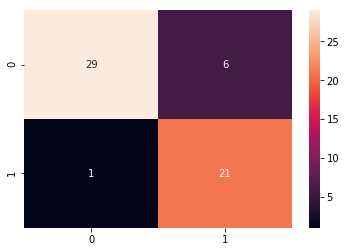

In [14]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,annot=True)

## XGBoost Model

In [15]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

## Bagging Model

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.96      1.00      0.98        22

   micro avg       0.98      0.98      0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57



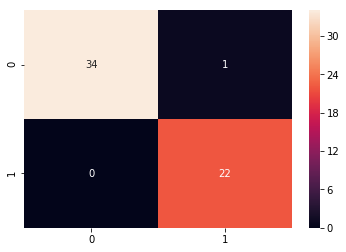

In [19]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=clf,n_estimators=10, random_state=0).fit(X_train, y_train)
y_pred = bag.predict(X_test)
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,annot=True)

## Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=2, random_state=0)
forest.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        35
           1       0.87      0.91      0.89        22

   micro avg       0.91      0.91      0.91        57
   macro avg       0.91      0.91      0.91        57
weighted avg       0.91      0.91      0.91        57



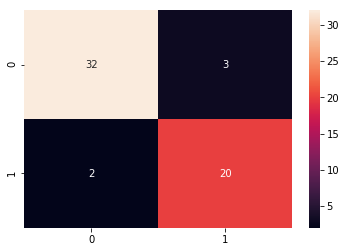

In [21]:
y_pred = forest.predict(X_test)
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,annot=True)

## Feature importance using Random Forest and XGBoost models

Feature Ranking - Random Forest:
1. feature 27 (0.205087)
2. feature 13 (0.147590)
3. feature 2 (0.140862)
4. feature 6 (0.102537)
5. feature 23 (0.093653)
6. feature 3 (0.088573)
7. feature 7 (0.084064)
8. feature 10 (0.061146)
9. feature 20 (0.020283)
10. feature 22 (0.016678)
11. feature 0 (0.016156)
12. feature 1 (0.006509)
13. feature 29 (0.004918)
14. feature 12 (0.004173)
15. feature 18 (0.003744)
16. feature 26 (0.003258)
17. feature 19 (0.000770)
18. feature 16 (0.000000)
19. feature 21 (0.000000)
20. feature 25 (0.000000)
21. feature 24 (0.000000)
22. feature 4 (0.000000)
23. feature 5 (0.000000)
24. feature 8 (0.000000)
25. feature 15 (0.000000)
26. feature 9 (0.000000)
27. feature 11 (0.000000)
28. feature 17 (0.000000)
29. feature 28 (0.000000)
30. feature 14 (0.000000)


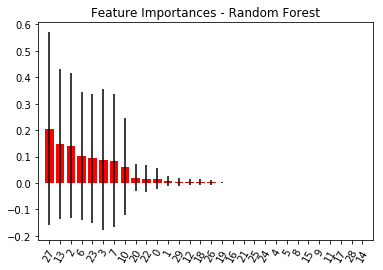

In [26]:
import numpy as np 

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature Ranking - Random Forest:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature Importances - Random Forest")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices, rotation=60)
#plt.xticks(x, labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

## Feature importance using SHAP

In [34]:
import shap

X_importance = X_test
explainer = shap.KernelExplainer(forest.predict, X_test)
shap_values = explainer.shap_values(X_importance)

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


In [37]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([df.iloc[:,1:].columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
2,perimeter_mean,0.108495
27,concave points_worst,0.089832
13,area_se,0.0495591
23,area_worst,0.0435595
6,concavity_mean,0.0370011
3,area_mean,0.031627
7,concave points_mean,0.0268136
20,radius_worst,0.0237559
10,radius_se,0.0209406
22,perimeter_worst,0.018486
